In [3]:
import pandas as pd
import numpy as np


In [4]:

df = pd.read_excel("input.xlsx")
df


,x1,x2,y
0,2,1,60
1,3,2,65
2,4,2,70
3,5,3,75
4,6,3,80


[60.00000000000001, 65.0, 70.0, 75.0, 80.0]
Equation: Y = (5.00)x1 + (0.00)x2 + 50.00 


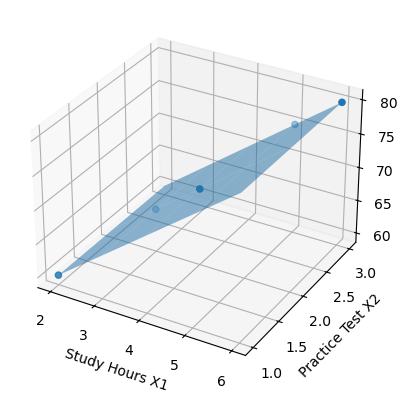

In [5]:

x1=df.iloc[:, 0].tolist()
x2=df.iloc[:, 1].tolist()
y=df.iloc[:, 2].tolist()

sum_x1 = sum(x1)
sum_x2 = sum(x2)
sum_y = sum(y)

n=len(y)

mean_x1 = sum_x1/n
mean_x2 = sum_x2/n
mean_y = sum_y/n

x1_sqr=0
for i in x1:
    x1_sqr = x1_sqr+ (i*i)
    
x2_sqr=0
for i in x2:
    x2_sqr = x2_sqr+ (i*i)

x1y = 0
for i,j in zip(x1,y):
    x1y = x1y + (i*j)

x2y = 0
for i,j in zip(x2,y):
    x2y = x2y + (i*j)
    
x1x2 = 0
for i,j in zip(x1,x2):
    x1x2 = x1x2 + (i*j)
    
final_x1_sqr = x1_sqr - (sum_x1*sum_x1)/n
final_x2_sqr = x2_sqr - (sum_x2*sum_x2)/n

final_x1y = x1y - (sum_x1*sum_y)/n
final_x2y = x2y - (sum_x2*sum_y)/n
final_x1x2 = x1x2 - (sum_x1*sum_x2)/n

b1 = ((final_x2_sqr*final_x1y)-(final_x1x2*final_x2y)) / ((final_x1_sqr*final_x2_sqr)-(final_x1x2*final_x1x2))

b2 = ((final_x1_sqr*final_x2y)-(final_x1x2*final_x1y)) / ((final_x1_sqr*final_x2_sqr)-(final_x1x2*final_x1x2))

b0 = mean_y - (b1*mean_x1) - (b2*mean_x2)

yy = []

for i,j in zip(x1,x2):
    yy.append(b0+(b1*i)+(b2*j))

print(yy)

print("Equation: Y = (%.2f)x1 + (%.2f)x2 + %.2f "%(b1,b2,b0))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1,x2,y)

x1_plane, x2_plane = np.meshgrid(x1, x2)
y_plane = b1 * x1_plane + b2 * x2_plane + b0

ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.5)

ax.set_xlabel('Study Hours X1')
ax.set_ylabel('Practice Test X2')
ax.set_zlabel('Score Y')

plt.show()